## Introduction to Pandas

[Pandas](https://pandas.pydata.org/) is a module for data analysis, manipulation, and visualization.  The basic object of the defined by this module is the [DataFrame](https://pandas.pydata.org/docs/reference/frame.html).  This is a dataset used in this notebook can be obtained from Kaggle on the [classification of stars](https://www.kaggle.com/brsdincer/star-type-classification).  We load the data from a CSV file into a Pandas DataFrame and demonstrate some basic functionality of the module.

### Data description from Kaggle

Star Type Classification

Variables:

- Temperature -- K

- L -- L/Lo

- R -- R/Ro

- AM -- Mv

- Color -- General Color of Spectrum

- Spectral_Class -- O,B,A,F,G,K,M / SMASS - [Wikipedia](https://en.wikipedia.org/wiki/Asteroid_spectral_types)

- Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

TARGET:

Type (0 to 5)

- Red Dwarf - 0
- Brown Dwarf - 1
- White Dwarf - 2
- Main Sequence - 3
- Super Giants - 4
- Hyper Giants - 5

MATH:

- Lo = 3.828 x 10^26 Watts
(Avg Luminosity of Sun)
- Ro = 6.9551 x 10^8 m
(Avg Radius of Sun)

### Loading data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
## The DataFrame can be created from a csv file using the read_csv method.
df = pd.read_csv('Stars.csv')
## The head method displays the first few rows of data togehter with the column headers
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
## The individual entries of the DataFrame can be accessed using the 'at' method, specifying the index and header
print(df.at[2,'A_M'])

18.7


In [5]:
## The describe method will give basic summary statistics for the numerical variables.
summary = df.describe()
print(summary)

        Temperature              L            R         A_M        Type
count    240.000000     240.000000   240.000000  240.000000  240.000000
mean   10497.462500  107188.361635   237.157781    4.382396    2.500000
std     9552.425037  179432.244940   517.155763   10.532512    1.711394
min     1939.000000       0.000080     0.008400  -11.920000    0.000000
25%     3344.250000       0.000865     0.102750   -6.232500    1.000000
50%     5776.000000       0.070500     0.762500    8.313000    2.500000
75%    15055.500000  198050.000000    42.750000   13.697500    4.000000
max    40000.000000  849420.000000  1948.500000   20.060000    5.000000


In [7]:
## Note that the summary we just created is also a DataFrame, and we have access to the entries.
print("Mean Temperature is:",summary.at['mean','Temperature'])
print("Max Temperature is:",summary.at['max','Temperature'])

Mean Temperature is: 10497.4625
Max Temperature is: 40000.0


In [8]:
## We can also call methods of the individual columns to get summary information.
## The column objects (such as df['Temperature']) are called Series
print("Mean Temperature is:",df['Temperature'].mean())
print("Max Temperature is:",df['Temperature'].max())

Mean Temperature is: 10497.4625
Max Temperature is: 40000


### Visualize single variable data

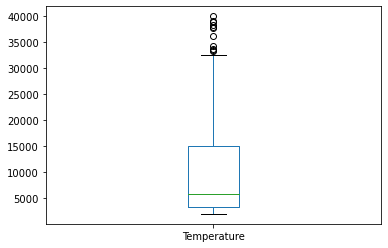

In [9]:
## The Series objects (columns) have plot methods as well as the numerical summary methods.
df['Temperature'].plot.box();

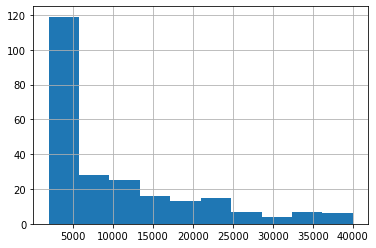

In [10]:
df['Temperature'].hist();

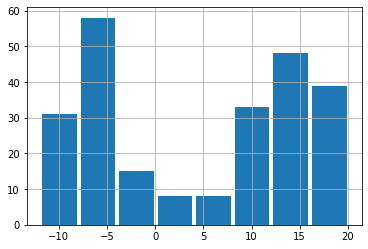

In [12]:
## Note that the use of the 'hist' method is the same as it is in matplotlib.
## We can control the bins and other parameters that affect the appearance.
df['A_M'].hist(bins=8,rwidth=0.9);

### Scatter plots for multiple variables

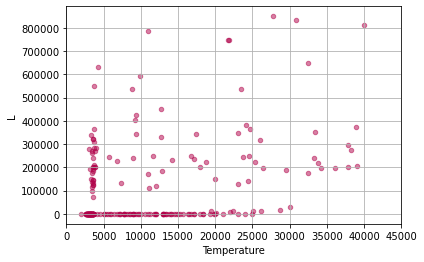

In [13]:
## We can make scatter plots using the plot method of the DataFrame.
## Again, we can use parameters to control the appearance as we did with matplotlib
ax = df.plot.scatter('Temperature','L',color='xkcd:raspberry',alpha=0.5);

## This method (as well as other plotting methods) returns a matplotlib Axes object, which we can name.  
## We can then manipulate the properties with the assigned name just as we did in the matplotlib notebook.
ax.grid(True)
ax.set_xlim(0,45000);
ax.set_yticks([100000*i for i in range(9)]);

### Sort the data

In [95]:
## The 'sort_values' has several options for sorting.
sorted_data = df.sort_values('Temperature',ascending=False)
sorted_data.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
6,2637,0.000730,0.127,17.22,Red,M,0
78,2621,0.000600,0.098,12.81,Red,M,1
7,2600,0.000400,0.096,17.40,Red,M,0
2,2600,0.000300,0.102,18.70,Red,M,0
4,1939,0.000138,0.103,20.06,Red,M,0


### Split data by categorical variable

In [129]:
## Describe the categorical variable 'Color'.  In this case we get different results
## than when we used describe on a numerical value.
print(df['Color'].describe())

count     240
unique     17
top       Red
freq      112
Name: Color, dtype: object


In [130]:
## Look at the unique values of 'Color'
print(df['Color'].unique())

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']


In [14]:
## We can see that there are several categories that should be grouped (e.g. Yellowish and yellowish)
## We could pass down the column and edit these duplicates

for i in range(len(df)):
    color = df.at[i,'Color']
    if color == 'yellowish': color = 'Yellowish'
    if color == 'Blue white': color = 'Blue White'
    if color == 'Blue-white': color = 'Blue White'
    if color == 'Blue-White': color = 'Blue White'
    if color == 'white': color = 'White'
    if color == 'White-Yellow': color = 'White Yellow'
    if color == 'yellow-white': color = 'White Yellow'
    df.at[i,'Color'] = color

print(df['Color'].unique())       

['Red' 'Blue White' 'White' 'Yellowish White' 'Pale yellow orange' 'Blue'
 'Whitish' 'White Yellow' 'Orange' 'Yellowish' 'Orange-Red']


In [104]:
## Create new data frames, selecting by a value of 'Color'
df_Red = df[df['Color'] == 'Red']
df_Blue = df[df['Color'] == 'Blue']
df_Red.describe()

,Temperature,L,R,A_M,Type
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,3291.785714,60526.787893,283.529700,8.173384,1.705357
std,490.780761,104282.874572,558.149251,11.241259,1.975701
min,1939.000000,0.000138,0.057000,-11.920000,0.000000
25%,2987.500000,0.000629,0.117500,-6.300000,0.000000
50%,3324.000000,0.002550,0.299000,13.095000,1.000000
75%,3550.750000,123750.000000,26.000000,16.890000,4.000000
max,6850.000000,363000.000000,1673.000000,20.060000,5.000000


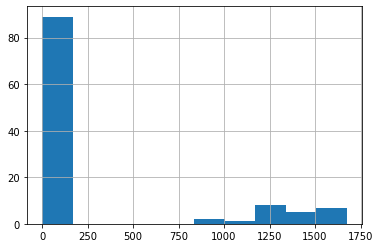

In [105]:
df_Red['R'].hist();

In [16]:
## To count the number of entries with each 'Color' value we can loop through list of unique color values, 
## create a new DataFrame be selecting that value, then display the number of entries using len
for color in df['Color'].unique():
    print(color,":",len(df[df['Color'] == color]))

Red : 112
Blue White : 41
White : 10
Yellowish White : 3
Pale yellow orange : 1
Blue : 56
Whitish : 2
White Yellow : 9
Orange : 2
Yellowish : 3
Orange-Red : 1


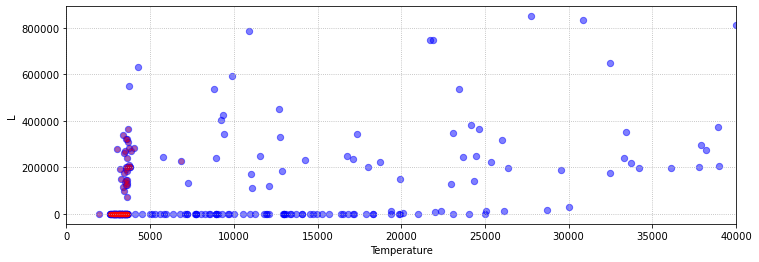

In [108]:
## In this plot we show the L versus Temperature plot that we made before, but color the  
## markers based on the 'Color' variable

## The first call creates an Axes for the scatter plot
ax = df.plot.scatter('Temperature','L',color='blue', s=40,alpha=0.5);
## In the second call, we specify that the plot should be on ax, the same Axes as the first plot
df_Red.plot.scatter('Temperature','L',color='red',ax=ax,alpha=0.25)

## Again, we can manipulate plot elements using Axes methods.
ax.grid(True,ls=':')
ax.set_xlim([0,40000])

## We need to get handle for current figure to manipulate figure properties.
## The gcf method "gets current figure".  This will look familiar if you've used Matlab
fig = plt.gcf()
fig.set_figwidth(12)

### Box plot of numerical data sorted by category

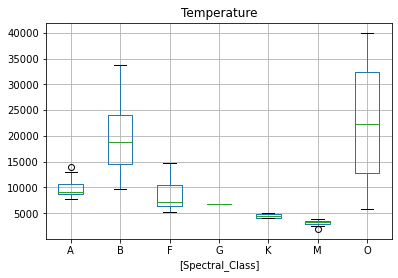

In [17]:
# We can create a new data frame with only selected columns by specifying a list of columns.
# The boxplot parameter 'by' will split the plot over the variable given.
df[['Temperature','Spectral_Class']].boxplot(by='Spectral_Class');

# Remove default title to declutter appearance
plt.suptitle('');

### Split data based on numerical variable

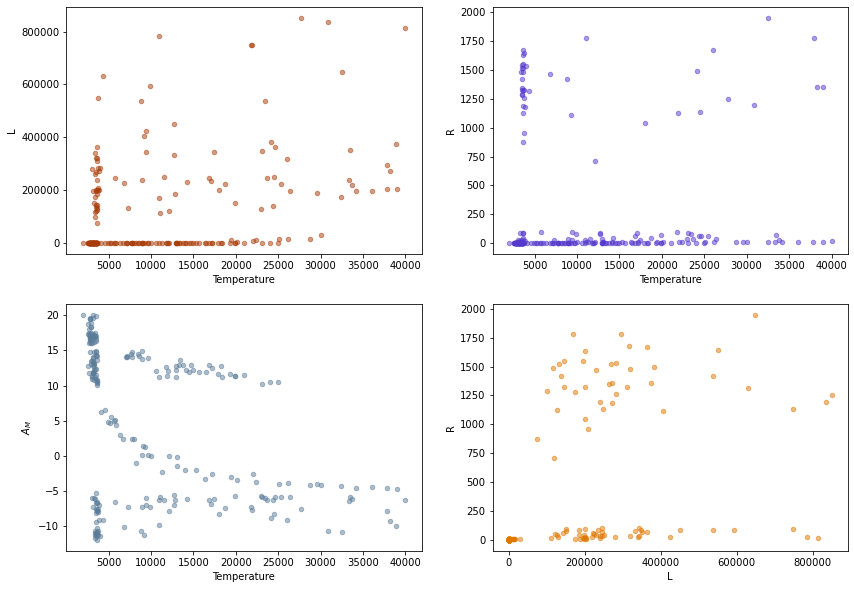

In [18]:
## To look at the relationship among the numerical values, we construct a figure with 4 subplots
## Each subplot is an Axes object where we can plot data and adjust appearances.

## Create the figure and assign a name to the list of Axes.  Adjust figure size.
fig, ax = plt.subplots(2,2)
fig.set_figwidth(14)
fig.set_figheight(10)

## Plot the data.  ax[i,j] references the the Axes in row i column j
df.plot.scatter('Temperature','L',color='xkcd:rust',alpha=0.5,ax=ax[0,0]);
df.plot.scatter('Temperature','R',color='xkcd:blurple',alpha=0.5,ax=ax[0,1]);
df.plot.scatter('Temperature','A_M',color='xkcd:slate blue',alpha=0.5,ax=ax[1,0]);
df.plot.scatter('L','R',color='xkcd:pumpkin',alpha=0.5,ax=ax[1,1]);

## Adjust the label of A_M to Latex string
ax[1,0].set_ylabel('$A_M$');

We can see in the plot of $A_M$ versus Temperature, that there is a cluster of points ($A_M>9$,Temperature $>5000$) where the variables appear to have a strong correlation.  We might want to isolate and study that particular subset of the data by extracting it to a different DataFrame.

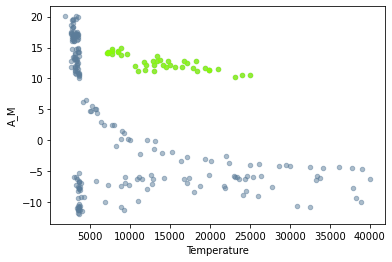

In [19]:
df_AM = df[df['A_M'] > 9]
df_TAM = df_AM[df_AM['Temperature'] > 5000]

## Plot the subset with the original
ax = df.plot.scatter('Temperature','A_M',color='xkcd:slate blue',alpha=0.5);
df_TAM.plot.scatter('Temperature','A_M',color='xkcd:lime green',ax=ax,alpha=0.7);

In [68]:
## We might view the categorical breakdown of this subset of data by color or class to see if it
## corresponds to a particular category
print(df_TAM['Spectral_Class'].describe())

count     40
unique     3
top        B
freq      24
Name: Spectral_Class, dtype: object


### Linear Regression

Since the data in the high-$A_M$, high-Temperature subset seem to be strongly correlated, we might fit linear model.  To do this we will import the $\texttt{linregress}$ function from the $\texttt{stats}$ module in SciPy.

In [21]:
from scipy.stats import linregress

linear_model = linregress(df_TAM['Temperature'],df_TAM['A_M'])

Let's plot the regression line together with the data.

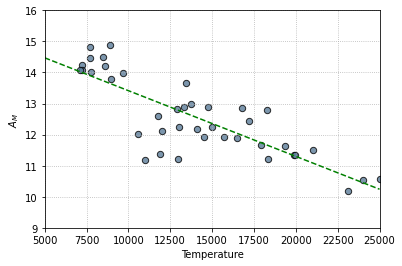

In [26]:
m = linear_model.slope
b = linear_model.intercept

x = np.linspace(5000,25000,5)
y = m*x + b
ax = df_TAM.plot.scatter('Temperature','A_M',color='xkcd:slate blue',s=40,edgecolor='black',alpha=0.8);
ax.plot(x,y,color='green',ls='dashed');

ax.set_ylim(9,16);
ax.set_xlim(5000,25000)
ax.grid(True,ls=':')
ax.set_ylabel('$A_M$');

The model object that was produced by $\texttt{linregress}$ also contains the correlation coefficient, pvalue, and standard error.

In [86]:
print("Correlation coefficient:",linear_model.rvalue)
print("pvalue for null hypothesis of slope = 0:",linear_model.pvalue)
print("Standard error of the esimated gradient:",linear_model.stderr)

Correlation coefficient: -0.8201933172733418
pvalue for null hypothesis of slope = 0: 9.411965493687399e-11
Standard error of the esimated gradient: 2.3930706947460813e-05
